<h1>Consumer Trend Analysis and categorical segmentation </h1>

<h2>1.1 Introduction </h2>

<h3>Part 1 of the project is</h3>

<p>Customer Personality Analysis is a detailed analysis of a company ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.</p>

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

And for the 2nd part we will try to predcit various trends for our customers based on the demographical and personal data collected.



**Following are steps that we took to reach the solution which helped us draw insights from our dataset.**

a. Importing Libraries and Data <br>
b. Handling the missing values <br>
c. Feature Engineering <br>
d. Data Analysis and Visualization <br>
e. Feature Scaling <br>
f. Clustering <br>
g. Clustering Analysis and customer profiling <br>
h. Regression Analysis <br>
f. Model Evaluation <br>






<h2> Dataset </h2>

<p> The Dataset is a customer marketing campagin data. It is bascially divided into 5 broad sections. <br>

<h3>1. <b>People</b>

<li> Id:


<h1> a. Importing Libraries and Data.

In [ ]:
# handle table-like data and matrices
import pandas as pd
import numpy as np
from datetime import datetime

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# regression analysis

from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# evaluations
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)





In [ ]:
data = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep ="\t") #data is the dataframe that would be used for Regression tasks
data2 = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep ="\t") #data2 is the dataframe used for the clustering tasks

<h1> b. Handling the missing values </h1>




In [ ]:
data.isnull().sum()
data2.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
data.Income = data.Income.fillna(data.Income.mean())
data2.Income = data2.Income.fillna(data2.Income.mean())

In [ ]:
data.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

<h1> c. Feature Engineering </h1>


In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dt_customer is not in the correct datetime format, so using the pd_datetime function we'll get it into the correct format.

In [ ]:
data['Dt_Customer']


0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],dayfirst=True)
data2['Dt_Customer'] = pd.to_datetime(data2['Dt_Customer'],dayfirst=True)

data['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

Creating a new column Age dervied from the exisiting DOB column. As age would have more wide application.

In [ ]:
data['Age'] = 2023 - data['Year_Birth']
data2['Age'] = 2023 - data2['Year_Birth']
data['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

Creating Another column called spent to sum up all the amounts spent across different categories

In [ ]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data2['Spent'] = data2['MntWines'] + data2['MntFruits'] + data2['MntMeatProducts'] + data2['MntFishProducts'] + data2['MntSweetProducts'] + data2['MntGoldProds']

In [ ]:
data['Spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2240, dtype: int64

Also creating a children columns



In [ ]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data2['Children'] = data2['Kidhome'] + data2['Teenhome']

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

In [ ]:
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})
data2['Living_With'] = data2['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

In [ ]:
to_drop = ['Year_Birth','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
data = data.drop(to_drop, axis=1)


In [ ]:
to_drop2 = ['ID','Dt_Customer','Z_CostContact','Z_Revenue']
data = data.drop(to_drop2, axis=1)

In [ ]:
data.shape

(2240, 20)

In [ ]:
data['Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']


In [ ]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent',
       'Children', 'Living_With', 'Purchases'],
      dtype='object')

In [ ]:
data[['Age','Income','Spent','Children','Purchases']]

,Age,Income,Spent,Children,Purchases
0,66,58138.0,1617,0,22
1,69,46344.0,27,2,4
2,58,71613.0,776,0,20
3,39,26646.0,53,1,6
4,42,58293.0,422,1,14
...,...,...,...,...,...
2235,56,61223.0,1341,1,16
2236,77,64014.0,444,3,15
2237,42,56981.0,1241,0,18
2238,67,69245.0,843,1,21


In [ ]:
data['Children'] = data['Children'].replace(0,3)
data['Children'] = data['Children'].replace(1,2)


In [ ]:
data[['Age','Income','Spent','Children','Purchases']]

,Age,Income,Spent,Children,Purchases
0,66,58138.0,1617,3,22
1,69,46344.0,27,2,4
2,58,71613.0,776,3,20
3,39,26646.0,53,2,6
4,42,58293.0,422,2,14
...,...,...,...,...,...
2235,56,61223.0,1341,2,16
2236,77,64014.0,444,3,15
2237,42,56981.0,1241,3,18
2238,67,69245.0,843,2,21


<h1>d. Data Analysis and Visualization</h1>



<Axes: xlabel='Income', ylabel='Spent'>

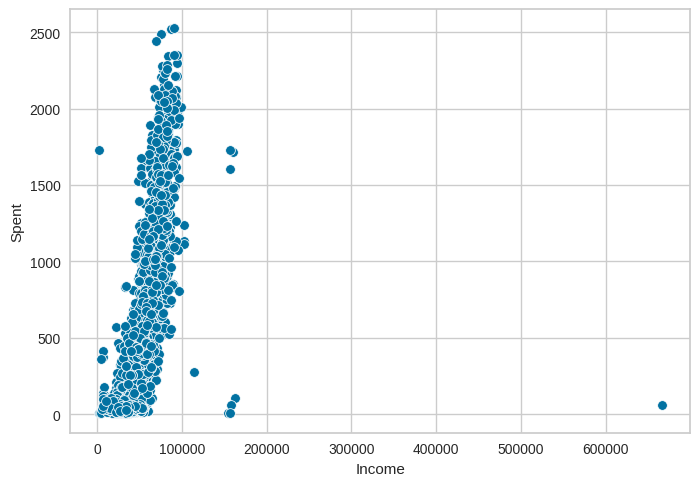

In [ ]:

sns.scatterplot(x='Income',y='Spent',data=data)

<Axes: xlabel='Children', ylabel='Income'>

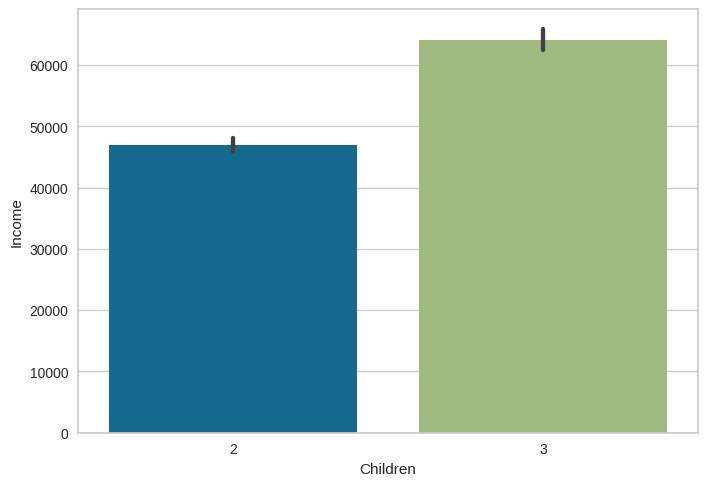

In [ ]:
sns.barplot(x='Children',y='Income',data=data)

<Axes: xlabel='Children', ylabel='Spent'>

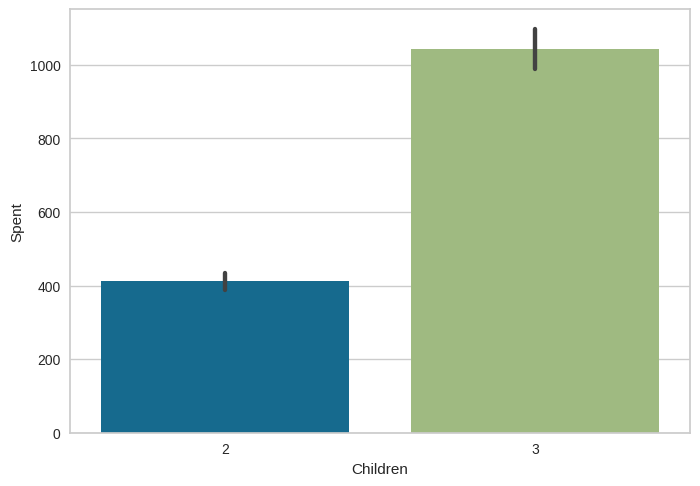

In [ ]:
sns.barplot(x='Children',y='Spent',data=data)

<Axes: xlabel='Children', ylabel='Purchases'>

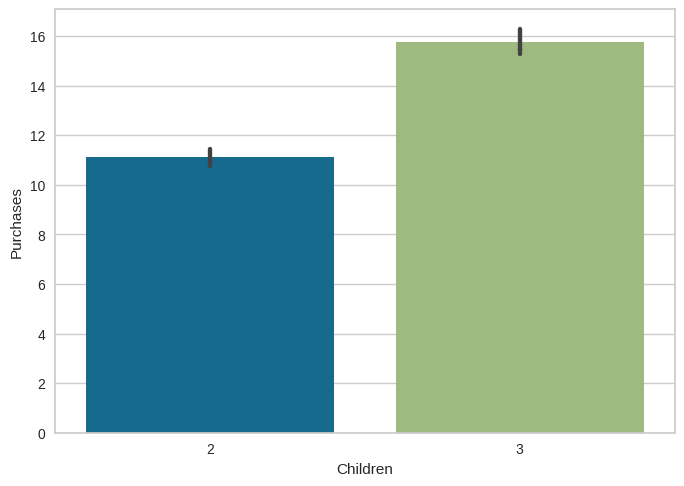

In [ ]:
sns.barplot(x='Children',y='Purchases',data=data)

<Axes: xlabel='Living_With', ylabel='Spent'>

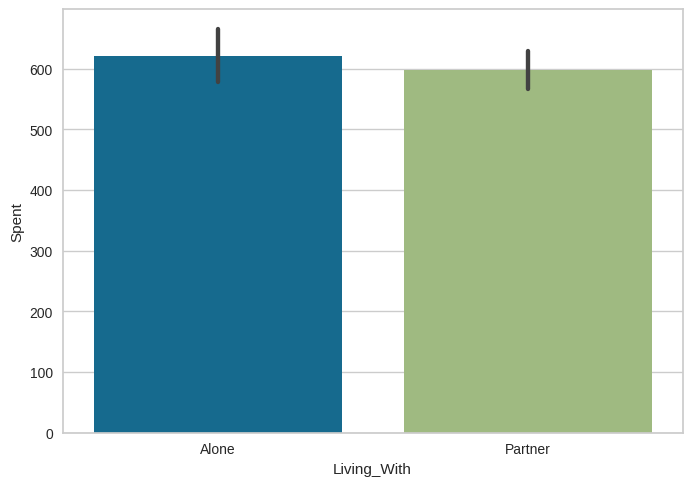

In [ ]:
sns.barplot(x='Living_With',y='Spent',data=data)

<Axes: xlabel='Spent', ylabel='Income'>

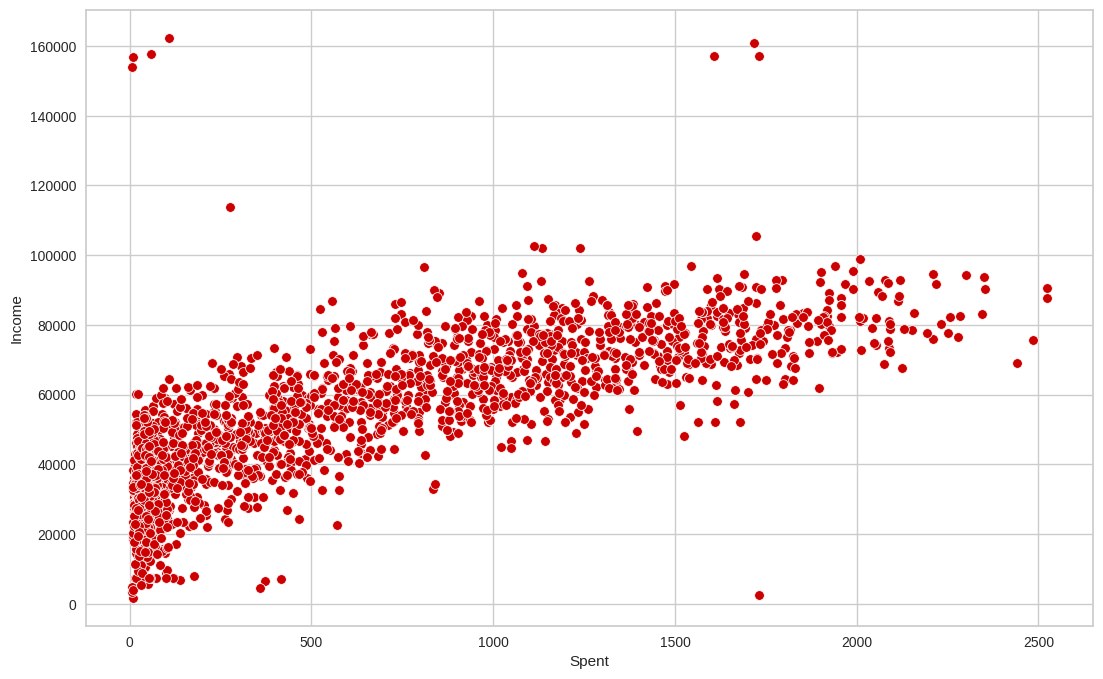

In [ ]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000')

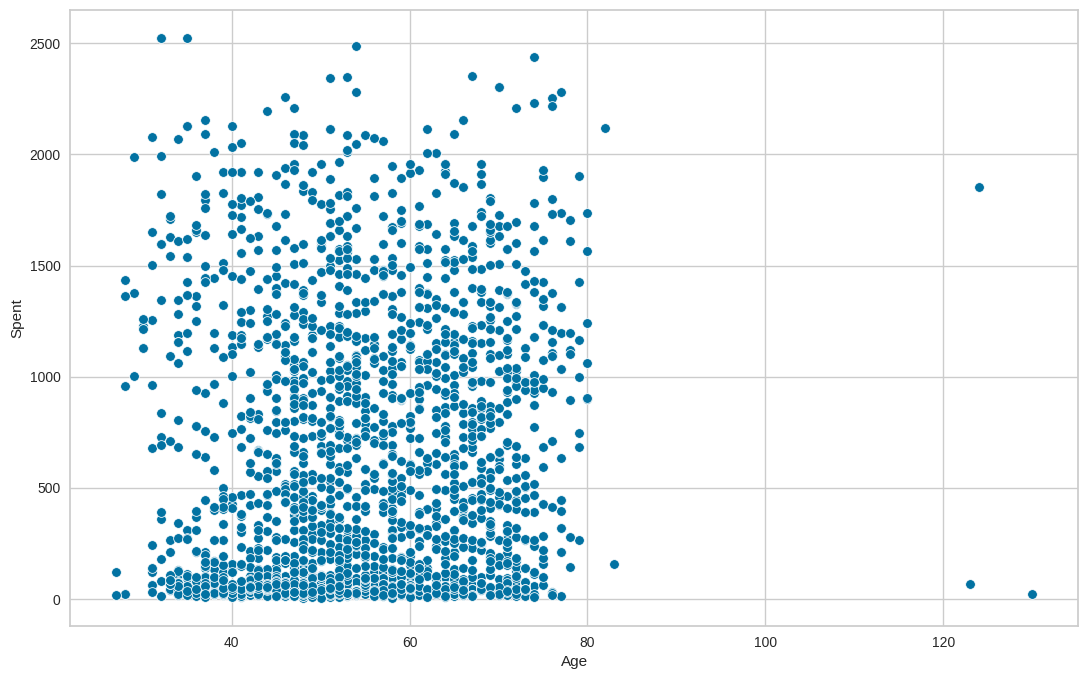

In [ ]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Age'], y=data['Spent']);

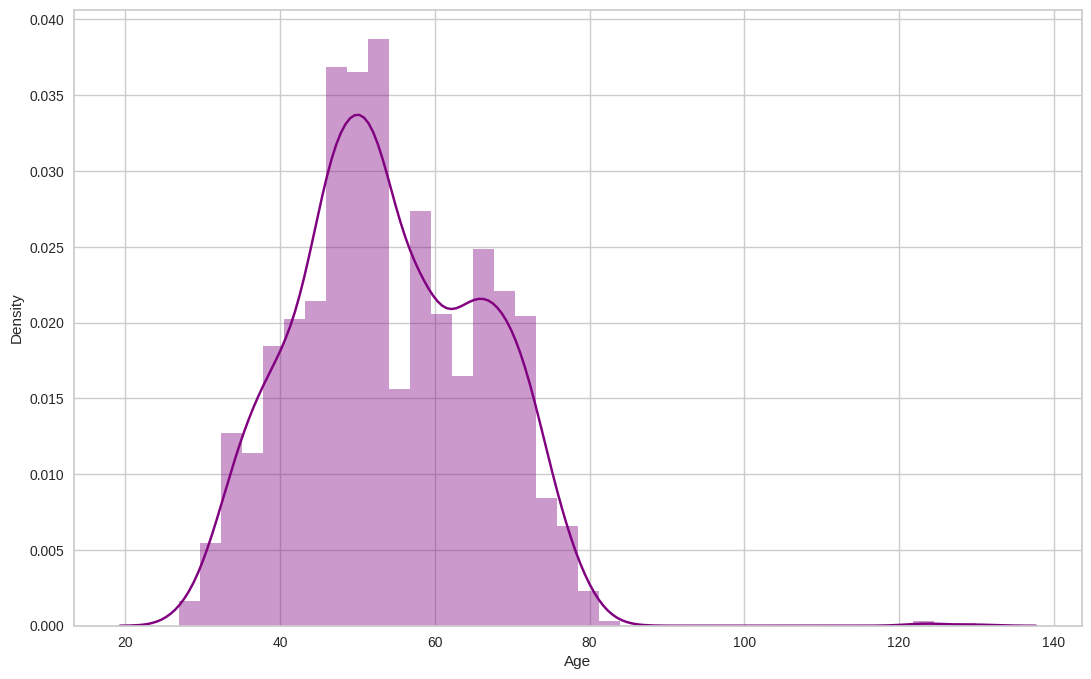

In [ ]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='purple');

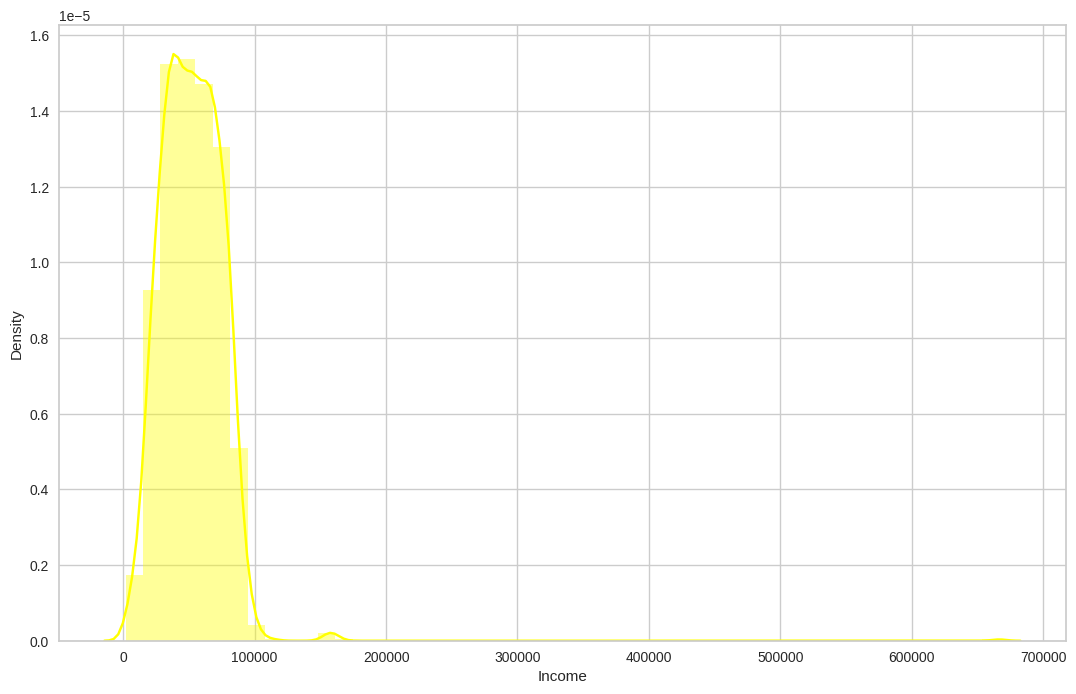

In [ ]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='Yellow');

In [ ]:
data[['Income','Age','Spent','Purchases','Children']].corr()

,Income,Age,Spent,Purchases,Children
Income,1.000000,0.160942,0.664706,0.622294,0.318196
Age,0.160942,1.000000,0.111306,0.162999,0.037982
Spent,0.664706,0.111306,1.000000,0.820687,0.484149
Purchases,0.622294,0.162999,0.820687,1.000000,0.299050
Children,0.318196,0.037982,0.484149,0.299050,1.000000


In [ ]:

data['Living_With'] = data['Living_With'].replace({'Alone':0, 'Partner':1})



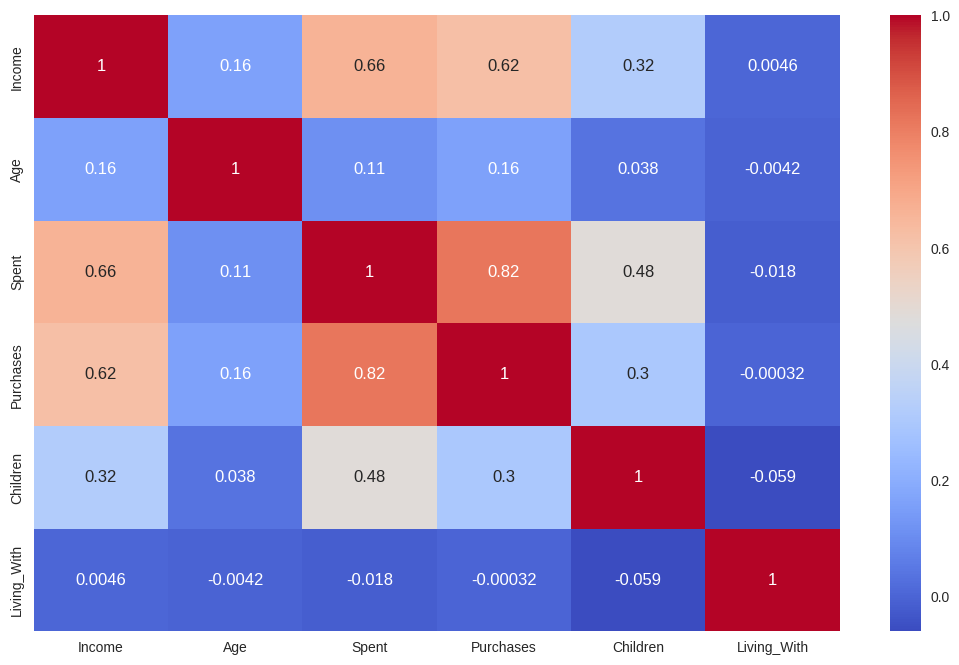

In [ ]:

data[['Income','Age','Spent','Purchases','Children','Living_With']].corr()


plt.figure(figsize=(13,8))
sns.heatmap(data[['Income','Age','Spent','Purchases','Children','Living_With']].corr(), annot=True, cmap='coolwarm');

In [ ]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent',
       'Children', 'Living_With', 'Purchases'],
      dtype='object')

In [ ]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Education','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Marital_Status','Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']



In [ ]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent',
       'Children', 'Living_With', 'Purchases'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

ValueError: ignored

In [ ]:
data.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Living_With,Purchases
0,Graduation,Single,58138.0,58,3,8,10,4,7,0,0,0,0,0,0,1,66,1617,3,0,22
1,Graduation,Single,46344.0,38,2,1,1,2,5,0,0,0,0,0,0,0,69,27,2,0,4
2,Graduation,Together,71613.0,26,1,8,2,10,4,0,0,0,0,0,0,0,58,776,3,1,20
3,Graduation,Together,26646.0,26,2,2,0,4,6,0,0,0,0,0,0,0,39,53,2,1,6
4,PhD,Married,58293.0,94,5,5,3,6,5,0,0,0,0,0,0,0,42,422,2,1,14


<h1> Regression Analysis </h1>

<h3> Model 1 (Attempt 1) - Mulitple Linear Regression </h3>


In [ ]:
X = data[['Income','Age','Children']]

y = data['Spent']

y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = LinearRegression()
model.fit(X_train,y_train)

predictions0 = model.predict(X_test)

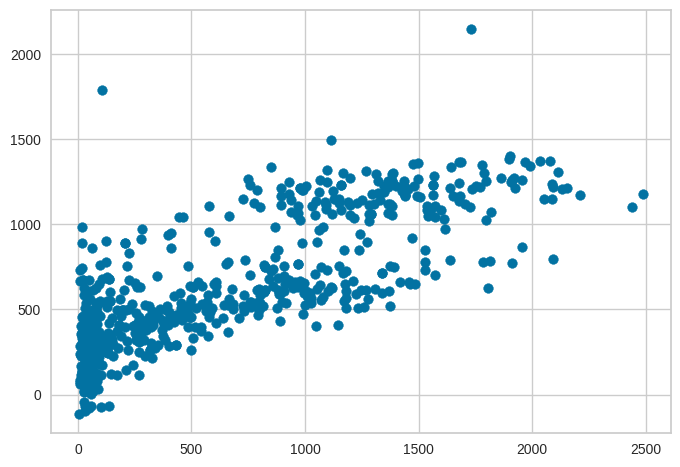

In [ ]:
plt.scatter(y_test,predictions0)

In [ ]:
print(y_test.dtype)
predictions0.shape
predictions0 = predictions0.reshape(672,1)

predictions0.shape

float64


(672, 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1> Model 1 (Attempt 2) Multiple Regression </h1>


In [ ]:
# 2nd Attempt
X = data[['Income','Age','Purchases','Children']]

y = data['Spent']

y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

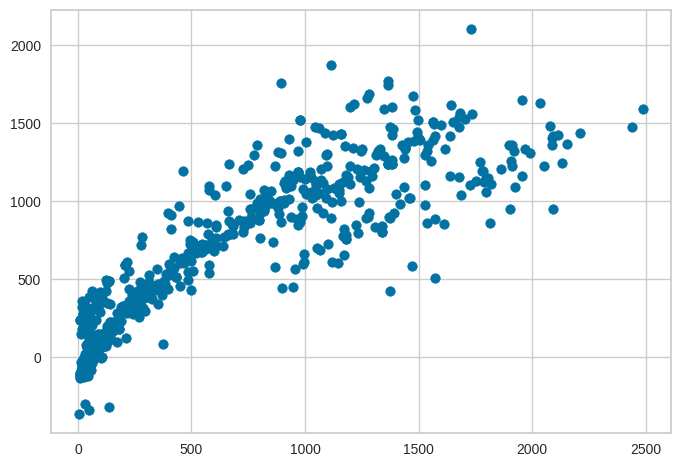

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
print(y_test.dtype)
predictions.shape

float64


(672,)

In [ ]:

predictions = predictions.reshape(672,1)

predictions.shape

(672, 1)

<h1> Model 1 (Attempt 1) Evaluation </h1>

MAE: 280.4727284348621
MSE: 136225.76034208148
RMSE: 369.087740709552


Text(0, 0.5, 'Predicted Y')

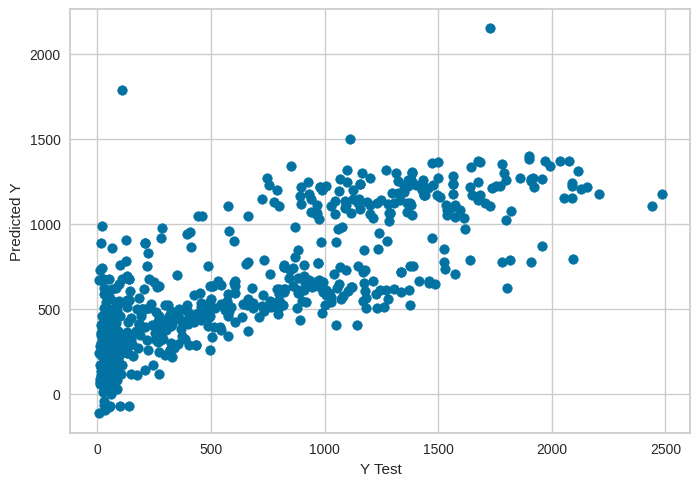

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions0))
print('MSE:', metrics.mean_squared_error(y_test, predictions0))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions0)))

#plot the predictions vs actual

plt.scatter(y_test,predictions0)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
r2_score(y_test,predictions0)

0.6214983123282801

<h1> Model 1 (Attempt 2) Evaluation </h1>

MAE: 187.97678315267473
MSE: 74895.49897193142
RMSE: 273.6704203452237


Text(0, 0.5, 'Predicted Y')

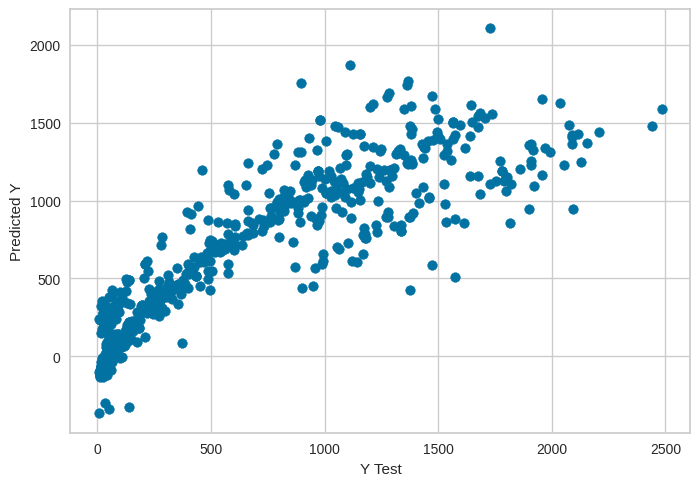

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#plot the predictions vs actual

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')



In [ ]:
r2_score(y_test,predictions)

0.7919037288637206

<h3> MODEL 2 - XgBoost Regression </h3>

In [ ]:
xgb = XGBRegressor( n_estimators=120, learning_rate=0.03)

xgb.fit(X_train,y_train)

predictions2 = xgb.predict(X_test)


In [ ]:
predictions2 = predictions2.reshape(672,1)

predictions2.shape

(672, 1)

<h3> MODEL 2 Evaluation </h3>

MAE: 134.8934791201637
MSE: 57014.2806870281
RMSE: 238.77663346112428


Text(0, 0.5, 'Predicted Y')

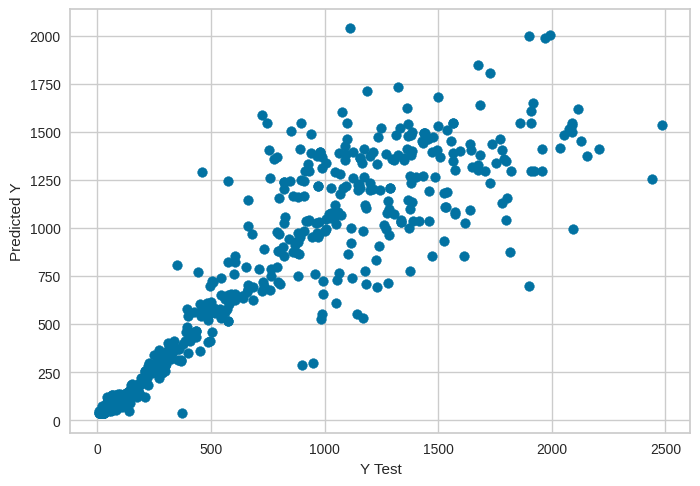

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

#plot the predictions vs actual

plt.scatter(y_test,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
r2_score(y_test,predictions2)

0.841586485498492

<h3> MODEL 3 - Ensemble Model - Random Forest Regression </h3>


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=43)
rf.fit(X_train, y_train)

predictions3 = rf.predict(X_test)


In [ ]:
predictions3 = predictions3.reshape(672,1)

predictions3.shape

(672, 1)

<h3> MODEL 3 Evaluation </h3>


MAE: 131.64407738095238
MSE: 57466.09268630952
RMSE: 239.72086410304283


Text(0, 0.5, 'Predicted Y')

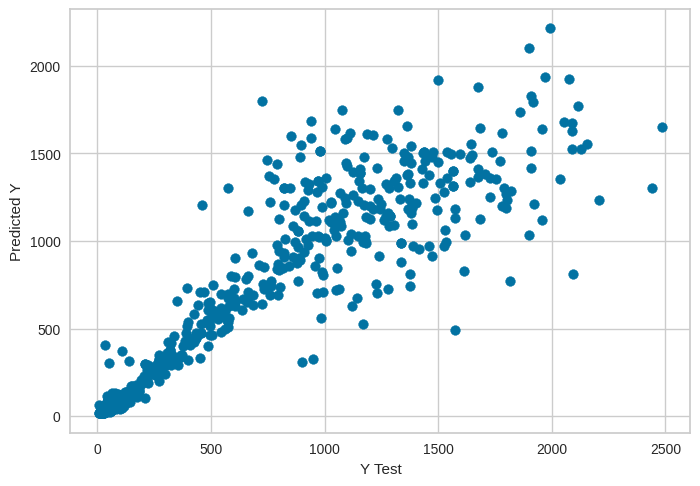

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions3))
print('MSE:', metrics.mean_squared_error(y_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))


plt.scatter(y_test,predictions3)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')



In [ ]:
r2_score(y_test,predictions3)

0.8403311311234537

<h1> Comparative Analysis </h1>

In [ ]:
models = [('Multiple Regression', metrics.mean_absolute_error(y_test, predictions), metrics.mean_squared_error(y_test, predictions), np.sqrt(metrics.mean_squared_error(y_test, predictions)), r2_score(y_test,predictions) ),
          ('Xg Boost',  metrics.mean_absolute_error(y_test, predictions2), metrics.mean_squared_error(y_test, predictions2), np.sqrt(metrics.mean_squared_error(y_test, predictions2)), r2_score(y_test,predictions2)),
          ('Random Forest Regression', metrics.mean_absolute_error(y_test, predictions3), metrics.mean_squared_error(y_test, predictions3), np.sqrt(metrics.mean_squared_error(y_test, predictions3)), r2_score(y_test,predictions3))
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'MAE', 'MSE', 'RSME', 'R2_Score(Test)'])
predict

,Model,MAE,MSE,RSME,R2_Score(Test)
0,Multiple Regression,187.976783,74895.498972,273.670420,0.791904
1,Xg Boost,134.893479,57014.280687,238.776633,0.841586
2,Random Forest Regression,131.644077,57466.092686,239.720864,0.840331


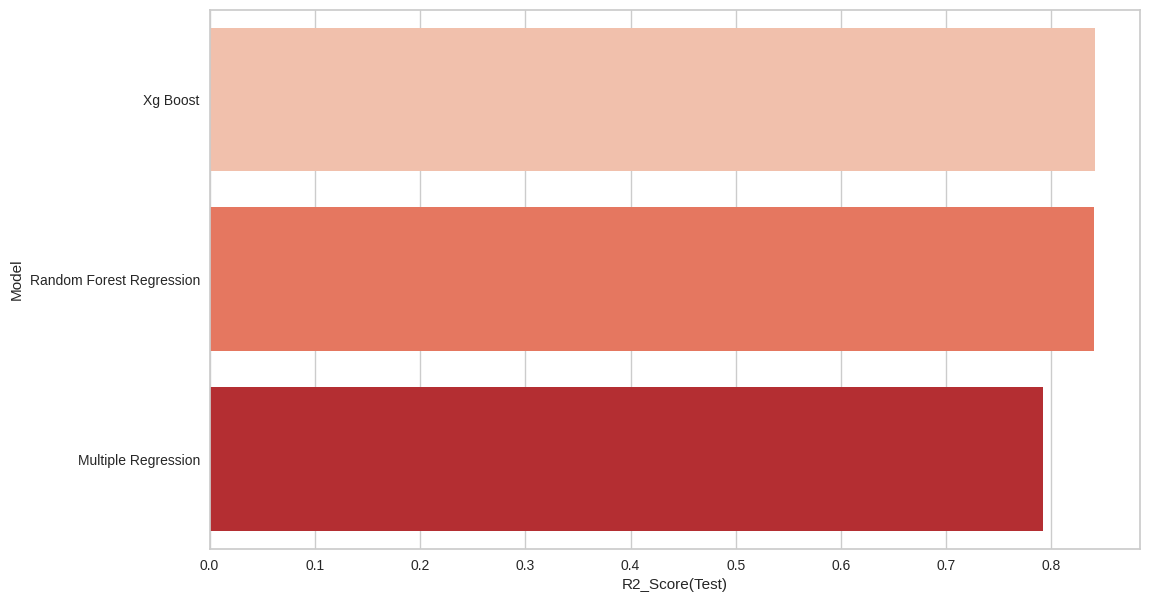

In [ ]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['R2_Score(Test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(Test)', y='Model',data = predict, palette='Reds')
plt.xlabel('R2_Score(Test)')
plt.ylabel('Model')
plt.show()